# Breast Cancer Project Kaggle

First import our libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm
from scipy import stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

Import data with pandas as dataframe:


In [2]:
df = pd.read_csv('data.csv')

In [3]:
#Check the status of the dataframe:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Cleaning:

In [4]:
#Check for Missing Values:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
#isna() or isnull() to see and sum() to total all true null values for each column:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# it appears Unnamed 32 has no place here, I drop it as well as 'id' as id will likely not aid my Exploratory Data Analysis.
df.drop(['id','Unnamed: 32'], 1, inplace=True)

In [7]:
#Check for duplicates:
df.duplicated().sum()

0

We can see some whitespace in a couple of column names

In [8]:
# Eliminate whitespace
df.columns = df.columns.str.replace(' ', '_')
# check for whitespace:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave_points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave_points_se          569 n

In [9]:
#Check for extraneous values, extraneous values will appear odd really high values , nans, or zero's where there ought not to be...

for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

diagnosis 
 B    0.627417
M    0.372583
Name: diagnosis, dtype: float64 


radius_mean 
 12.34    0.007030
12.77    0.005272
15.46    0.005272
12.89    0.005272
13.05    0.005272
Name: radius_mean, dtype: float64 


texture_mean 
 14.93    0.005272
15.70    0.005272
18.90    0.005272
16.84    0.005272
17.46    0.005272
Name: texture_mean, dtype: float64 


perimeter_mean 
 82.61     0.005272
134.70    0.005272
87.76     0.005272
130.00    0.003515
58.79     0.003515
Name: perimeter_mean, dtype: float64 


area_mean 
 512.2     0.005272
1214.0    0.003515
399.8     0.003515
758.6     0.003515
1075.0    0.003515
Name: area_mean, dtype: float64 


smoothness_mean 
 0.1007    0.008787
0.1075    0.007030
0.1054    0.007030
0.1150    0.007030
0.1089    0.005272
Name: smoothness_mean, dtype: float64 


compactness_mean 
 0.12060    0.005272
0.11470    0.005272
0.04994    0.003515
0.13390    0.003515
0.12670    0.003515
Name: compactness_mean, dtype: float64 


concavity_mean 
 0.00000    0.02

### Screen for Categorical Data


We will have to treat exploratory analysis for this data differently to the other continuous float data sources.

In [10]:
# Note that one of our columns 'Diagnosis' has type: Object 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave_points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave_points_se          569 n

In [11]:
df.shape

(569, 31)

# Exploratory Data Analysis

## Histograms to check Normality of Data:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D4FF6CB188>,
      dtype=object)

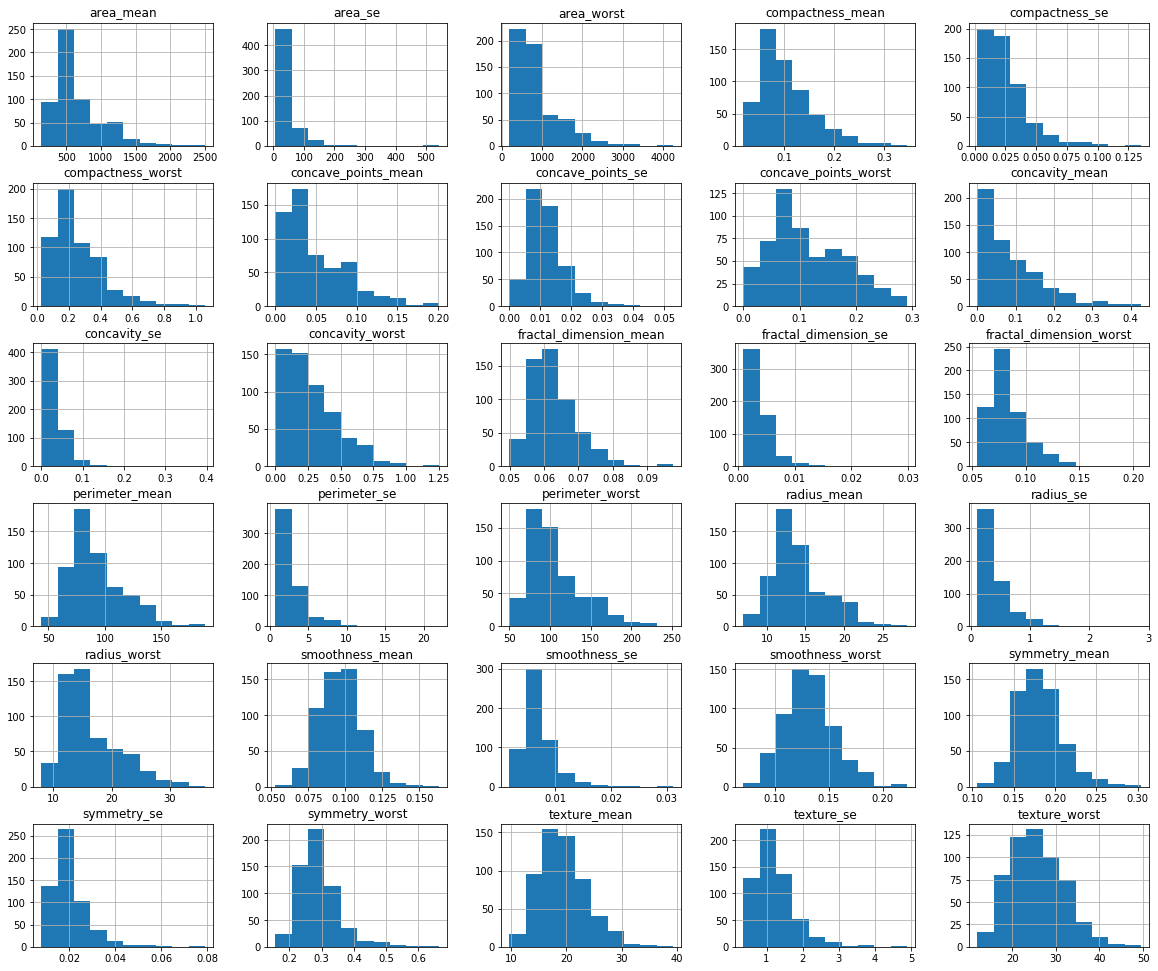

In [12]:
hist = df.hist(figsize=(20,17))
hist

Above we can observe normality of distribution for each feature in the dataset.
There are several features which appear to have a normal distribution including: Texture_worst, Smoothness_worst, Texture_mean, Smoothness_mean and Symmetry_mean. Although These features aren't exempt to outliers and we can look into removing them as necessary down the line.

Many features appear positively skewed (right Skew), a transformation could be employed here to normalise the data for futher investigation.

# Transformation for Standardisation:

In [13]:
# Below we a for loop to iterate over a list of non-normal features cube rooting them as it iterates. 
# The cube root is used here to avoide the issue of transforming zero's which are plenty in our data
# Furthermore the cube root transformation has a strong effective on the distribution andcan be used on data with zeros

non_normal = ['area_mean', 'area_worst', 'compactness_mean', 'compactness_worst', 'concave_points_mean', 'concave_points_worst', 'concavity_mean', 'concavity_worst', 'fractal_dimension_mean', 'fractal_dimension_worst', 'perimeter_mean', 'perimeter_worst', 'radius_mean', 'radius_worst', 'symmetry_worst']
df_temp_join = pd.DataFrame()

for feat in non_normal:
    df_temp_join[feat] = df[feat].map(lambda x: np.cbrt(x))


In [16]:
# Join onto our temp table made above with pandas default inner join and renamed duplicate columns with rsuffixes _CBRT


df_norms = df.join(df_temp_join, rsuffix='_CBRT') 
df_norms.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,concave_points_worst_CBRT,concavity_mean_CBRT,concavity_worst_CBRT,fractal_dimension_mean_CBRT,fractal_dimension_worst_CBRT,perimeter_mean_CBRT,perimeter_worst_CBRT,radius_mean_CBRT,radius_worst_CBRT,symmetry_worst_CBRT
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.642639,0.669507,0.892907,0.428558,0.491731,4.970493,5.693910,2.620256,2.938758,0.772000
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.570827,0.442935,0.622824,0.384106,0.446508,5.103189,5.415229,2.739963,2.923628,0.650296
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.624025,0.582258,0.766536,0.391465,0.444087,5.065797,5.342649,2.700320,2.867168,0.712234
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.636198,0.622653,0.882330,0.460164,0.557205,4.264976,4.624039,2.251932,2.461270,0.872327
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.545696,0.582848,0.736806,0.388925,0.425027,5.131194,5.339143,2.727474,2.824780,0.618324


Make a new dataframe (df_normalised) which drops unnecessary non-normalised values and values we know we will not use(any standard error columns).

In [17]:
df_normalised = df_norms.drop(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se'], axis = 1)

In [18]:
df_normalised.drop(['area_mean', 'area_worst', 'compactness_mean', 'compactness_worst', 'concave_points_mean', 'concave_points_worst', 'concavity_mean', 'concavity_worst', 'fractal_dimension_mean', 'fractal_dimension_worst', 'perimeter_mean', 'perimeter_worst', 'radius_mean', 'radius_worst', 'symmetry_worst'], axis = 1, inplace=True)

In [19]:
df_normalised.head()

,diagnosis,texture_mean,smoothness_mean,symmetry_mean,texture_worst,smoothness_worst,area_mean_CBRT,area_worst_CBRT,compactness_mean_CBRT,compactness_worst_CBRT,...,concave_points_worst_CBRT,concavity_mean_CBRT,concavity_worst_CBRT,fractal_dimension_mean_CBRT,fractal_dimension_worst_CBRT,perimeter_mean_CBRT,perimeter_worst_CBRT,radius_mean_CBRT,radius_worst_CBRT,symmetry_worst_CBRT
0,M,10.38,0.11840,0.2419,17.33,0.1622,10.003332,12.638982,0.652339,0.873114,...,0.642639,0.669507,0.892907,0.428558,0.491731,4.970493,5.693910,2.620256,2.938758,0.772000
1,M,17.77,0.08474,0.1812,23.41,0.1238,10.986209,12.506130,0.428431,0.571440,...,0.570827,0.442935,0.622824,0.384106,0.446508,5.103189,5.415229,2.739963,2.923628,0.650296
2,M,21.25,0.10960,0.2069,25.53,0.1444,10.635434,11.955856,0.542770,0.751552,...,0.624025,0.582258,0.766536,0.391465,0.444087,5.065797,5.342649,2.700320,2.867168,0.712234
3,M,20.38,0.14250,0.2597,26.50,0.2098,7.281708,8.280177,0.657237,0.953285,...,0.636198,0.622653,0.882330,0.460164,0.557205,4.264976,4.624039,2.251932,2.461270,0.872327
4,M,14.34,0.10030,0.1809,16.67,0.1374,10.905527,11.634834,0.510191,0.589637,...,0.545696,0.582848,0.736806,0.388925,0.425027,5.131194,5.339143,2.727474,2.824780,0.618324


# Check distribution again

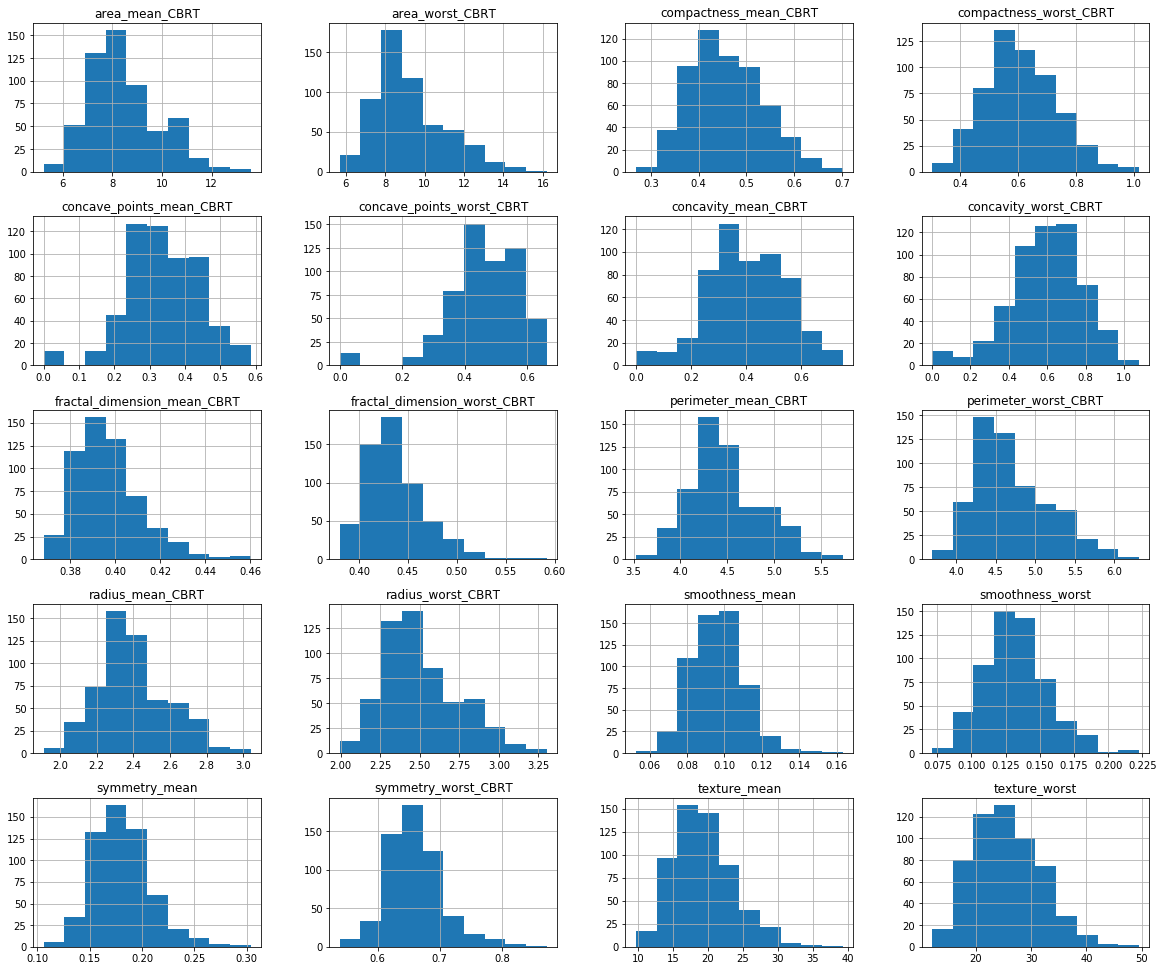

In [20]:
normalised_hist = df_normalised.hist(figsize=(20,17))

# Address Outliers

Due to losing almost half the data, we chose not to include the process below outlined here:
- calculate quartile 0.25 , 0.75 and IQR and remove all IQR*1.5 values above the upper plus IQR*1.5 and below the lower quartiles minus IQR*1.5


In [19]:
# #Below I create upper and lower quartiles to evaluate IQR and therefore IQR*1.5 
# Q1 = df2.quantile(0.25)
# Q3 = df2.quantile(0.75)
# IQR = Q3 - Q1
# cons=IQR*1.5
# print(cons)

# 5.369000e-02

In [20]:
# #these iqr*1.5 values will be used to eliminate outliers in following code
# upper_outlier = Q3+cons
# lower_outlier = Q1-cons
# print(upper_outlier)
# print('-------------')
# # print(lower_outlier)


In [21]:
#Check the datatype of the outlier values 
# type(upper_outlier), type(lower_outlier)

In [22]:
#They are pandas series, a quick google shows we can loop through them 
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# df3 = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [23]:
# df3.hist(figsize=(20,17))

In [24]:
# df2.hist(figsize=(20,17))

# Correlation Heatmap

In [21]:
#A correlation table using pandas:
corr_matrix = df_normalised.corr()
corr_matrix

,texture_mean,smoothness_mean,symmetry_mean,texture_worst,smoothness_worst,area_mean_CBRT,area_worst_CBRT,compactness_mean_CBRT,compactness_worst_CBRT,concave_points_mean_CBRT,concave_points_worst_CBRT,concavity_mean_CBRT,concavity_worst_CBRT,fractal_dimension_mean_CBRT,fractal_dimension_worst_CBRT,perimeter_mean_CBRT,perimeter_worst_CBRT,radius_mean_CBRT,radius_worst_CBRT,symmetry_worst_CBRT
texture_mean,1.000000,-0.023389,0.071401,0.912045,0.077503,0.325592,0.352119,0.230639,0.262881,0.237696,0.208601,0.270109,0.248394,-0.076932,0.114516,0.326366,0.356299,0.320878,0.350932,0.100861
smoothness_mean,-0.023389,1.000000,0.557775,0.036072,0.805324,0.155372,0.199625,0.681359,0.492410,0.544865,0.454480,0.512388,0.415842,0.589283,0.508907,0.195074,0.231312,0.157786,0.205855,0.393347
symmetry_mean,0.071401,0.557775,1.000000,0.090651,0.426675,0.134316,0.172572,0.580965,0.460170,0.405599,0.336665,0.434776,0.359256,0.477633,0.440526,0.169579,0.209429,0.134964,0.177909,0.710013
texture_worst,0.912045,0.036072,0.090651,1.000000,0.225429,0.302180,0.362709,0.248428,0.349963,0.264019,0.286758,0.295638,0.330662,-0.050587,0.215920,0.306057,0.369140,0.299564,0.363120,0.233037
smoothness_worst,0.077503,0.805324,0.426675,0.225429,1.000000,0.110138,0.206548,0.593904,0.590230,0.473646,0.500071,0.478712,0.506522,0.509538,0.630218,0.142278,0.232233,0.110049,0.210804,0.505493
area_mean_CBRT,0.325592,0.155372,0.134316,0.302180,0.110138,1.000000,0.974081,0.498341,0.448710,0.762087,0.673420,0.657675,0.559168,-0.339274,0.002767,0.996316,0.971504,0.998325,0.976491,0.159117
area_worst_CBRT,0.352119,0.199625,0.172572,0.362709,0.206548,0.974081,1.000000,0.531088,0.507841,0.769257,0.698064,0.673179,0.594319,-0.282850,0.089679,0.968900,0.991293,0.968526,0.997497,0.238070
compactness_mean_CBRT,0.230639,0.681359,0.580965,0.248428,0.593904,0.498341,0.531088,1.000000,0.896918,0.819165,0.757629,0.872373,0.802562,0.543763,0.695459,0.551838,0.593410,0.502362,0.541446,0.490091
compactness_worst_CBRT,0.262881,0.492410,0.460170,0.349963,0.590230,0.448710,0.507841,0.896918,1.000000,0.731153,0.782451,0.820687,0.879983,0.437888,0.785102,0.499869,0.575630,0.456412,0.521817,0.589192
concave_points_mean_CBRT,0.237696,0.544865,0.405599,0.264019,0.473646,0.762087,0.769257,0.819165,0.731153,1.000000,0.941479,0.940580,0.849585,0.137901,0.387230,0.794762,0.805151,0.767540,0.780695,0.358901


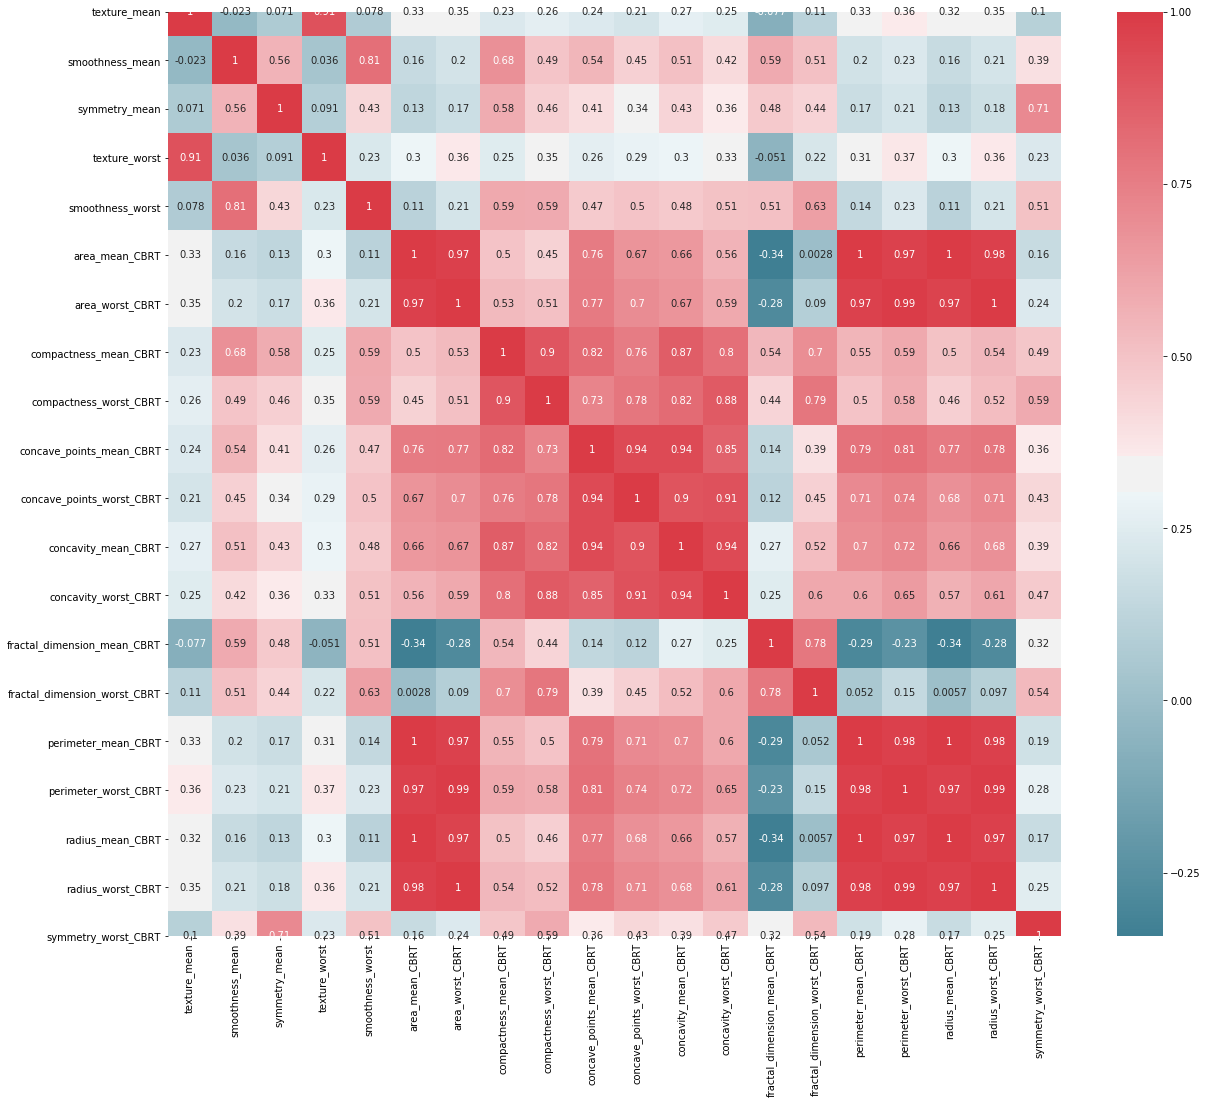

In [23]:
# Heatmap using Seaborn:
def correlation_heatmap(df_normalised):
    _,ax=plt.subplots(figsize=(20,17))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df_normalised.corr(),annot=True,cmap=colormap)
correlation_heatmap(df_normalised)

Second Heatmap for interest purposes:

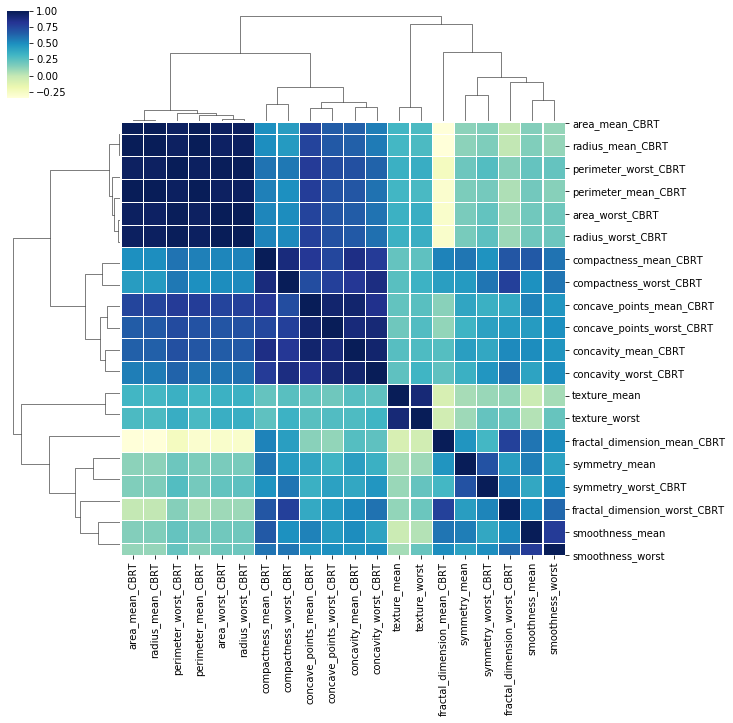

In [24]:
#Second Heatmap for comparison and interest
corrmat = df_normalised.corr() 
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
cg 


## Removing features that are too closely related (>0.9)

In [27]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]


to_drop

# Drop features
non_corr_df = df_normalised.drop(['texture_worst', 'area_worst_CBRT', 'concave_points_worst_CBRT', 'concavity_mean_CBRT', 'concavity_worst_CBRT', 'perimeter_mean_CBRT', 'perimeter_worst_CBRT', 'radius_mean_CBRT',
 'radius_worst_CBRT'], axis = 1)

non_corr_df.info()
non_corr_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
diagnosis                       569 non-null object
texture_mean                    569 non-null float64
smoothness_mean                 569 non-null float64
symmetry_mean                   569 non-null float64
smoothness_worst                569 non-null float64
area_mean_CBRT                  569 non-null float64
compactness_mean_CBRT           569 non-null float64
compactness_worst_CBRT          569 non-null float64
concave_points_mean_CBRT        569 non-null float64
fractal_dimension_mean_CBRT     569 non-null float64
fractal_dimension_worst_CBRT    569 non-null float64
symmetry_worst_CBRT             569 non-null float64
dtypes: float64(11), object(1)
memory usage: 53.5+ KB


(569, 12)

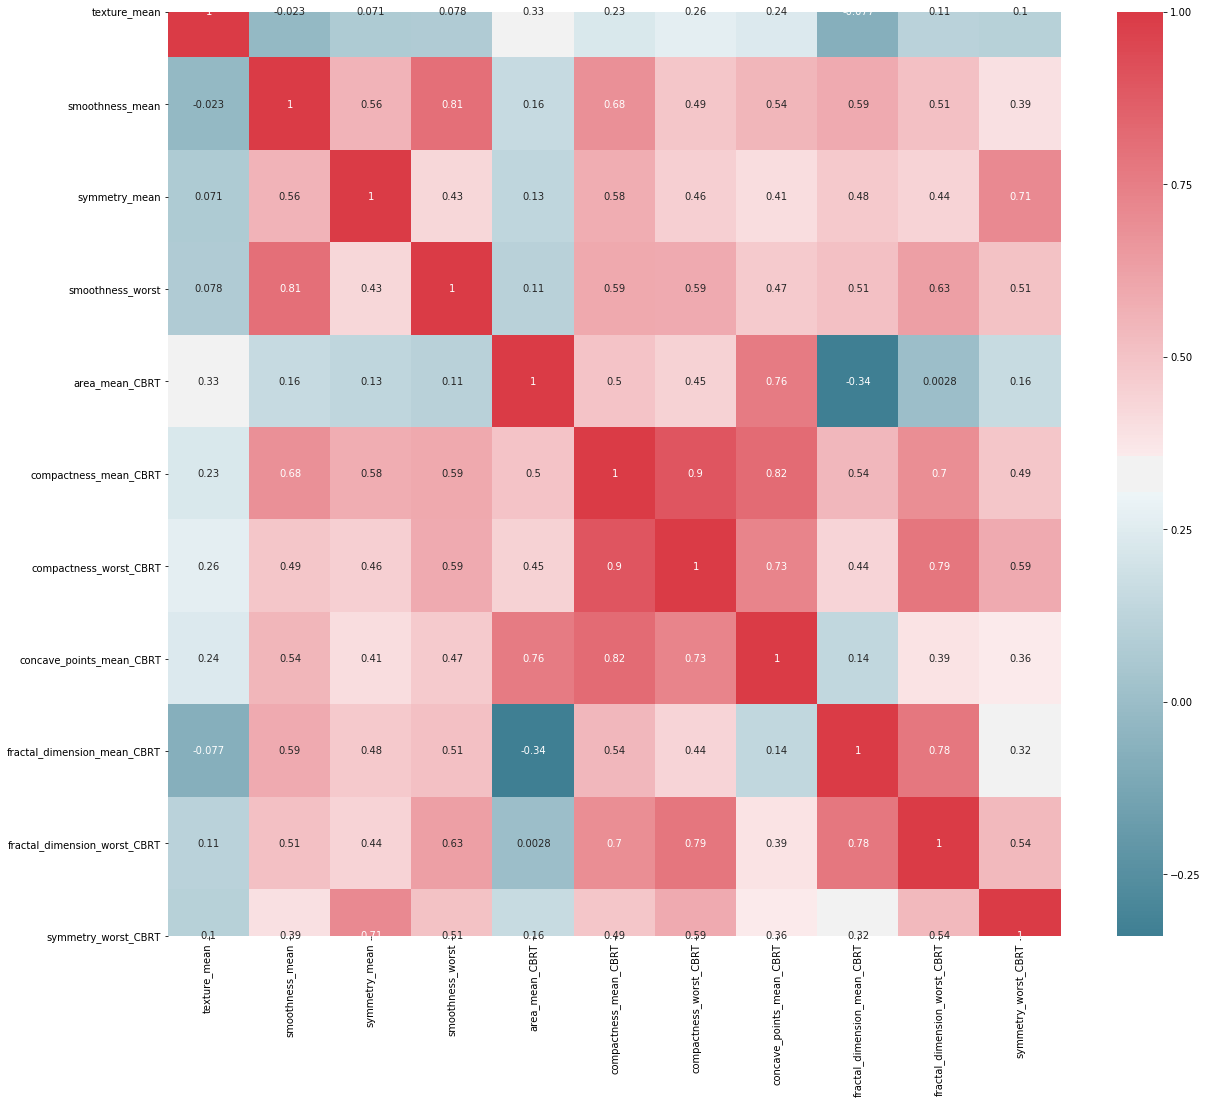

In [28]:
def correlation_heatmap(non_corr_df):
    _,ax=plt.subplots(figsize=(20,17))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(non_corr_df.corr(),annot=True,cmap=colormap)
correlation_heatmap(non_corr_df)

### Pairwise plot with Seaborn to show 

In [29]:
#Create a subset to make a pairwise plot with from the new non-correlated Df:
non_corr_df_subset1 = non_corr_df.iloc[:,1:6]
non_corr_df_subset1.shape


(569, 5)

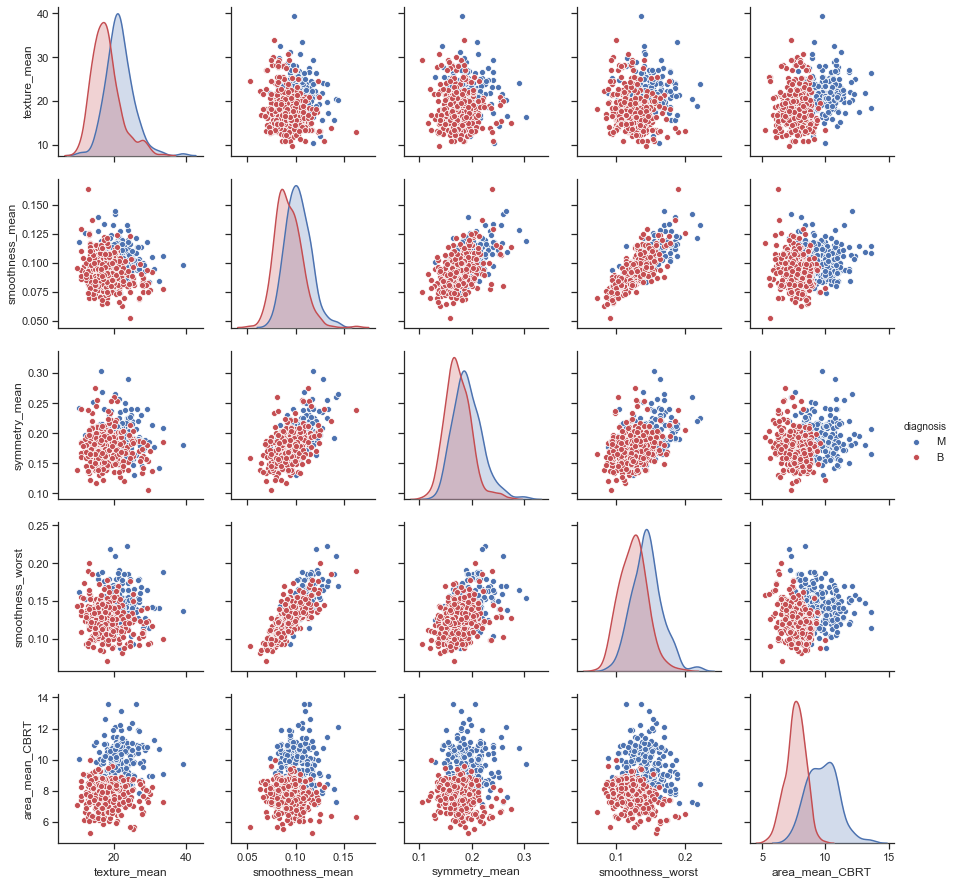

In [30]:
# sns is a seaborn object
non_corr_df_subset1['diagnosis'] = non_corr_df['diagnosis']
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(non_corr_df_subset1, palette = ('b', 'r'), hue="diagnosis", height=2.5)
plt.show()

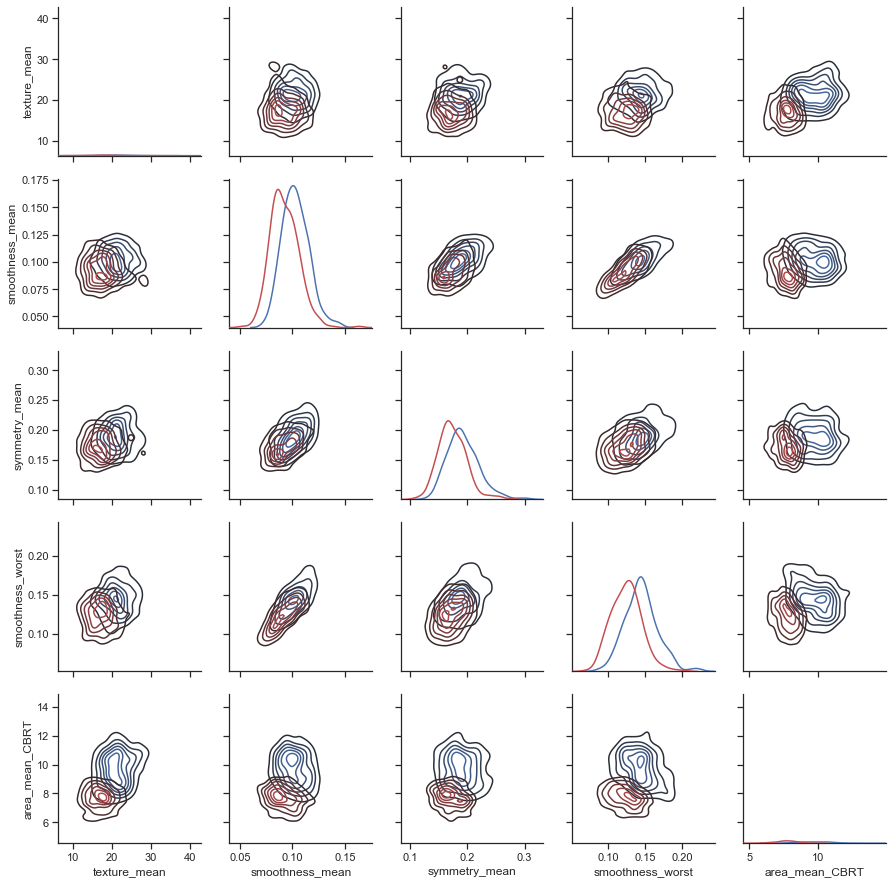

In [35]:
# non_corr_df_subset2 = non_corr_df.iloc[:,6:11]
# non_corr_df_subset2['diagnosis'] = df['diagnosis']
# sns.set(style="ticks", color_codes=True)
# g = sns.pairplot(non_corr_df_subset2, palette = ('b', 'r'), hue="diagnosis", height=2.5)
# plt.show()

g = sns.PairGrid(non_corr_df_subset1, palette = ('b', 'r'), hue="diagnosis", height=2.5)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

# Using T-Test to check difference between means of two groups:


Features of malignant cells Vs Fetures of Benign Cells

According to the EDA above we have isolated four features ('area_mean_CBRT', 'compactness_mean_CBRT', 'compactness_worst_CBRT', 'concave_points_mean_CBRT') that are most likely to reognise a malignant cell from a benign cell.

Below are plots of bivariate histograms for the four features and Welch's T-test results
Welch's T-test used instead of students due to the unequal sample size between the diagnosis groups.

as a side note we initally tried a Groupby but the aggregate function mean() gave one value - a mean - for each diagnosis group (malignant and benign). Therefore the degrees of freedom was 0 for the test and the t-test returned this error.

### Plots of bivariate histograms for four isolated features

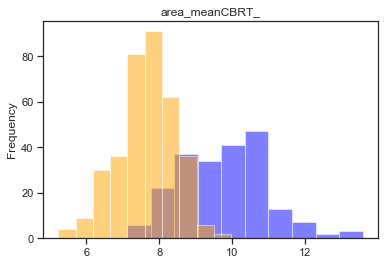

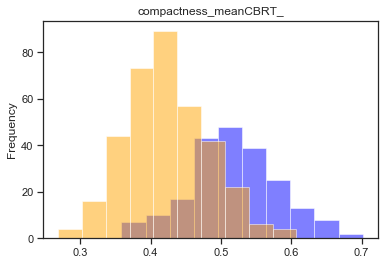

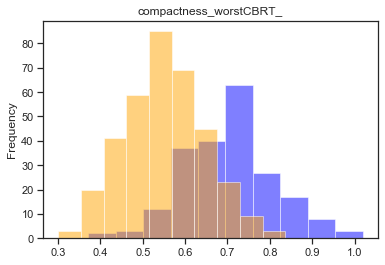

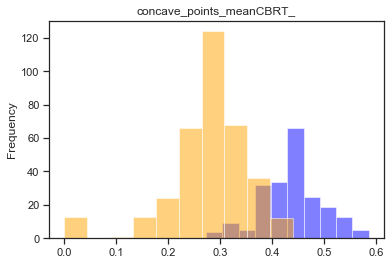

In [33]:
for i in ['area_mean_CBRT', 'compactness_mean_CBRT', 'compactness_worst_CBRT', 'concave_points_mean_CBRT']: 
    plt.figure()
    non_corr_df[i]
   
    non_corr_df[i][non_corr_df['diagnosis'] =='M'].plot.hist(alpha = 0.5, color='blue', title = i)
    non_corr_df[i][non_corr_df['diagnosis'] =='B'].plot.hist(alpha = 0.5, color='orange', title = i)
    plt.show()

# Welch's T-Test's for selected features:

# T-Test For loop:
below a loop iterates through all the features that have less than 0.91 correlation in the correlation matrix. We drop diagnosis as that is the categorical variable we are grouping the data by.
The results are printed in f string format.

In [34]:
df_t_test_feat = non_corr_df.drop('diagnosis',1)
for i in df_t_test_feat.columns:
    t_results = []
    i1=non_corr_df.loc[non_corr_df['diagnosis'] == 'B', i]
    i2=non_corr_df.loc[non_corr_df['diagnosis'] == 'M', i]
    t_results.append(f'{i} ----------- {stats.ttest_ind(i1,i2, equal_var = False)}')
    print(t_results)

['texture_mean ----------- Ttest_indResult(statistic=-11.022086546579432, pvalue=3.019055292193917e-25)']
['smoothness_mean ----------- Ttest_indResult(statistic=-9.297355109660026, pvalue=5.573331322107757e-19)']
['symmetry_mean ----------- Ttest_indResult(statistic=-8.112197650883767, pvalue=5.957650760938452e-15)']
['smoothness_worst ----------- Ttest_indResult(statistic=-10.819553043932244, pvalue=3.4743759425754134e-24)']
['area_meanCBRT_ ----------- Ttest_indResult(statistic=-23.110843802296564, pvalue=8.230229504425566e-70)']
['compactness_meanCBRT_ ----------- Ttest_indResult(statistic=-17.60543840086473, pvalue=5.6076017879557874e-52)']
['compactness_worstCBRT_ ----------- Ttest_indResult(statistic=-17.308347489613826, pvalue=1.8454243290055847e-50)']
['concave_points_meanCBRT_ ----------- Ttest_indResult(statistic=-27.60111008394631, pvalue=3.2672669905208683e-105)']
['fractal_dimension_meanCBRT_ ----------- Ttest_indResult(statistic=0.41846312326450774, pvalue=0.675835212957

### Further reductions and conversions
1. We can see that 'fractal_dimension_mean_CBRT' has a pvalue of >0.05 (0.68), it can be dropped.
2. We can convert our Diagnosis from 'M' and 'B' Values to 0's and 1's which will help the regression model interpret the data. 

In [36]:
#Drop fractal_dimension_mean_CBRT
non_corr_df.drop('fractal_dimension_mean_CBRT', 1, inplace=True)
non_corr_df.columns

Index(['diagnosis', 'texture_mean', 'smoothness_mean', 'symmetry_mean',
       'smoothness_worst', 'area_mean_CBRT', 'compactness_mean_CBRT',
       'compactness_worst_CBRT', 'concave_points_mean_CBRT',
       'fractal_dimension_worst_CBRT', 'symmetry_worst_CBRT'],
      dtype='object')

In [40]:
#Convert diagnosis groups to binary format in a new dataframe:
model_DF = pd.DataFrame()
model_DF = non_corr_df
model_DF['diagnosis'] = non_corr_df['diagnosis'].map({'M': 1, 'B': 0})

In [41]:
model_DF.head()

,diagnosis,texture_mean,smoothness_mean,symmetry_mean,smoothness_worst,area_mean_CBRT,compactness_mean_CBRT,compactness_worst_CBRT,concave_points_mean_CBRT,fractal_dimension_worst_CBRT,symmetry_worst_CBRT
0,1,10.38,0.11840,0.2419,0.1622,10.003332,0.652339,0.873114,0.527883,0.491731,0.772000
1,1,17.77,0.08474,0.1812,0.1238,10.986209,0.428431,0.571440,0.412462,0.446508,0.650296
2,1,21.25,0.10960,0.2069,0.1444,10.635434,0.542770,0.751552,0.503837,0.444087,0.712234
3,1,20.38,0.14250,0.2597,0.2098,7.281708,0.657237,0.953285,0.472069,0.557205,0.872327
4,1,14.34,0.10030,0.1809,0.1374,10.905527,0.510191,0.589637,0.470719,0.425027,0.618324


In [42]:
model_DF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
diagnosis                       569 non-null int64
texture_mean                    569 non-null float64
smoothness_mean                 569 non-null float64
symmetry_mean                   569 non-null float64
smoothness_worst                569 non-null float64
area_mean_CBRT                  569 non-null float64
compactness_mean_CBRT           569 non-null float64
compactness_worst_CBRT          569 non-null float64
concave_points_mean_CBRT        569 non-null float64
fractal_dimension_worst_CBRT    569 non-null float64
symmetry_worst_CBRT             569 non-null float64
dtypes: float64(10), int64(1)
memory usage: 49.0 KB


# Ordinary Least Square
Below we perform an OLS Regression with statsmodels using 10 predictor variables that we have selected after our Exploratory Data Analysis

In [45]:
model_data = model_DF

In [46]:
model_data.head()

,diagnosis,texture_mean,smoothness_mean,symmetry_mean,smoothness_worst,area_mean_CBRT,compactness_mean_CBRT,compactness_worst_CBRT,concave_points_mean_CBRT,fractal_dimension_worst_CBRT,symmetry_worst_CBRT
0,1,10.38,0.11840,0.2419,0.1622,10.003332,0.652339,0.873114,0.527883,0.491731,0.772000
1,1,17.77,0.08474,0.1812,0.1238,10.986209,0.428431,0.571440,0.412462,0.446508,0.650296
2,1,21.25,0.10960,0.2069,0.1444,10.635434,0.542770,0.751552,0.503837,0.444087,0.712234
3,1,20.38,0.14250,0.2597,0.2098,7.281708,0.657237,0.953285,0.472069,0.557205,0.872327
4,1,14.34,0.10030,0.1809,0.1374,10.905527,0.510191,0.589637,0.470719,0.425027,0.618324


In [47]:
# Using a pandas .drop() and a string.join we can quickly set up the model formula for fitting:

outcome = 'diagnosis'
predictors = model_DF.drop('diagnosis', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

model = ols(formula= formula, data= model_data).fit()

In [1]:
#The model summary:
model.summary()

NameError: name 'model' is not defined

# Summary

During our investigation on Breast Cancer Cell data we have discovered that two groups of cells are responsible for cancerous tumours, those are benign and malignant. 


We aimed to discover 1). If characteristics were significantly different between diagnosis groups. 2). Were there any strong associations among the tmour cell characteristics? and 3). Could we predict malignancy of tumours based on characteristics of cell nuclei

After cleaning and transforming the necessary columns of data, our EDA led us to drop more unneccesary features. 

We examined features using histrogram plots which suggested cell characteristics were different between diagnosis groups.

We used a Welch's T-Test to measure statistical significance between the means of the two groups for each remaining characteristics all bar one of which were P<0.05.

A correlation matrix Heatmap was employed to identify strong associations between characteristics and those with correlation >0.9 were dropped from the dataset going forward.

Finally we employed an ols regression to measure the model fit using the characteristics we had extracted at this point. 


The model output shows R^2 of >0.7, suggesting that we can with 71% accuracy predict the diagnosis of the cell type (malignant of benign) from a set of specific cell characteristics